# Exploratory Data Analysis

### Source
- https://archive.ics.uci.edu/ml/datasets/Forest+Fires

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv('forest_fires/forestfires.csv', dtype = {'X': str, 'Y': str})

In [3]:
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [4]:
df.columns

Index(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'],
      dtype='object')

In [5]:
categorical_cols = ['X', 'Y', 'month', 'day']
df[categorical_cols].describe()

,X,Y,month,day
count,517,517,517,517
unique,9,7,12,7
top,4,4,aug,sun
freq,91,203,184,95


In [6]:
numerical_cols = [col for col in df.columns.tolist() if not col in categorical_cols]
df[numerical_cols].describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


### Exploring

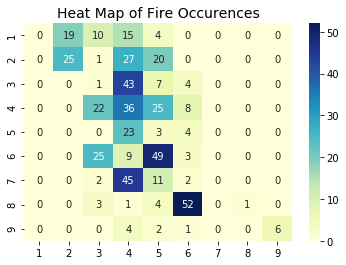

In [7]:
position = df.groupby(['X', 'Y']).count()['month'].unstack().fillna(0)
position.index.name = None
position.columns.name = None
position = pd.concat([position, pd.DataFrame({'1': np.zeros(9), '7':np.zeros(9)},index=position.index)],  axis = 1)
position = position.reindex(sorted(position.columns), axis=1).astype(int)
ax = sns.heatmap(position, annot=True, cmap="YlGnBu")
ax.set_title('Heat Map of Fire Occurences', fontsize='14');

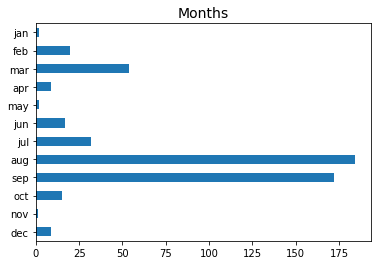

In [8]:
# fig, (ax1, ax2) = plt.subplots(1,2, figsize=(15,5))
df['month'] = pd.Categorical(df['month'], ["jan", "feb", "mar", "apr", "may", "jun",
                                           "jul", "aug", "sep", "oct", "nov", "dec"])
ax = df.month.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Months", fontsize=14);

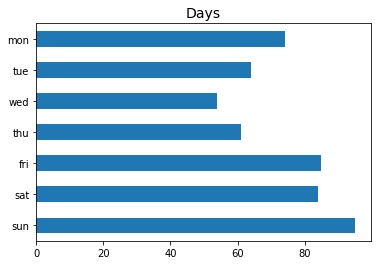

In [9]:
df['day'] = pd.Categorical(df['day'], ["mon", "tue", "wed", "thu", "fri", "sat", "sun"])
ax = df.day.value_counts(sort=False).sort_index(ascending=False).plot.barh()
ax.set_title("Days", fontsize=14);

### Forest Weather Index (FWI)
Is a Canadian system for rating fire danter. It includes six components (Cortez et al).
- Fine Fuel Moisture Code (FFMC): moisture content surface litter and influences ignition and fire spread
- Initial Spread Index (ISI): Fire velocity spread
- Duff Moisture Code (DMC): moisture content of shallow organic layers
- Drought Code (DC): moisture content of deep organic layers

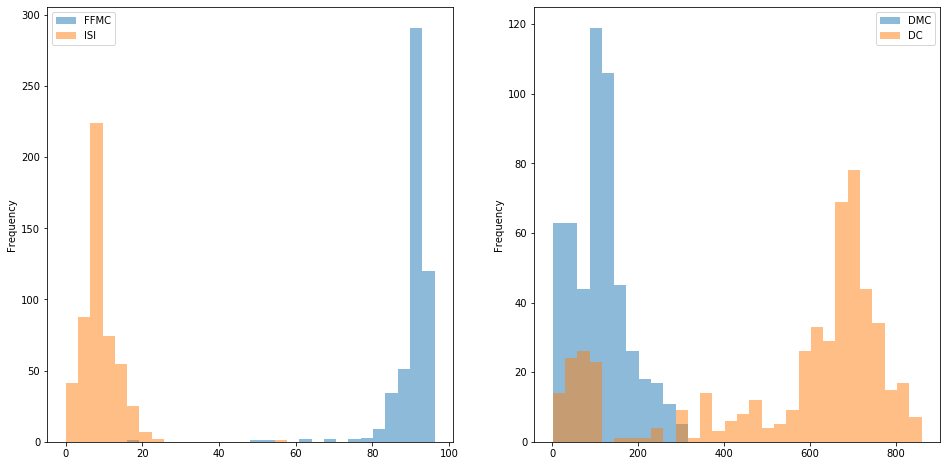

In [10]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,8))
df[['FFMC', 'ISI']].plot.hist(ax=ax1, bins=30, alpha=0.5)
df[['DMC', 'DC']].plot.hist(ax=ax2, bins=30, alpha=0.5);

### Weather Indicators
- temp: Temperature (Celcius)
- RH: Relative humidity (%)
- wind (km/h)
- rain (mm/m2)

In [11]:
# Remove Rain Outliers
sorted_rain = df.rain.sort_values(ascending=False)
print(sorted_rain.head(10))
print(sorted_rain.tail(10))
df = df[df.rain < 6.0]

499    6.4
509    1.4
243    1.0
500    0.8
501    0.8
502    0.4
286    0.2
3      0.2
516    0.0
172    0.0
Name: rain, dtype: float64
341    0.0
342    0.0
343    0.0
344    0.0
345    0.0
346    0.0
347    0.0
348    0.0
349    0.0
0      0.0
Name: rain, dtype: float64


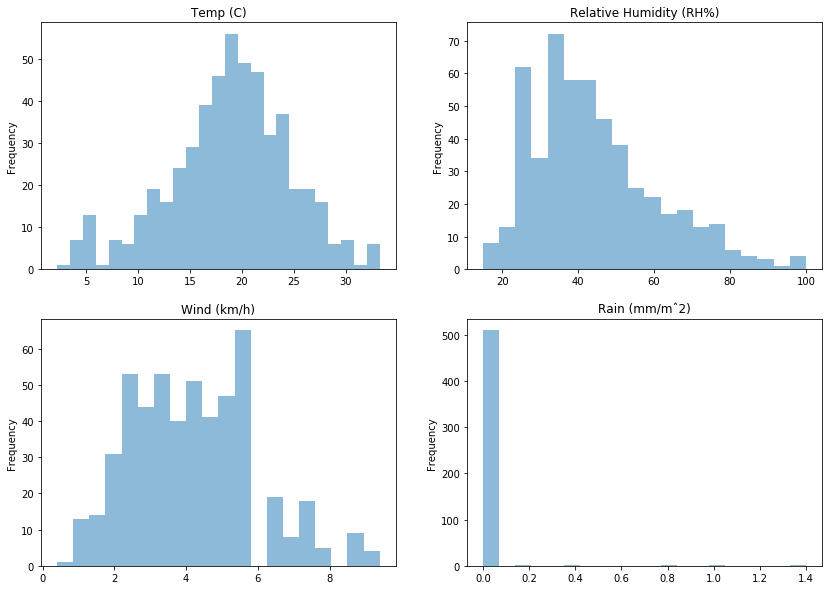

In [12]:
fig, axes = plt.subplots(2,2, figsize=(14,10))
df['temp'].plot.hist(ax=axes[0,0], bins=25, alpha=0.5, title='Temp (C)')
df['RH'].plot.hist(ax=axes[0,1], bins=20, alpha=0.5, title='Relative Humidity (RH%)')
df['wind'].plot.hist(ax=axes[1,0], bins=20, alpha=0.5, title='Wind (km/h)');
df['rain'].plot.hist(ax=axes[1,1], bins=20, alpha=0.5, title='Rain (mm/mˆ2)');

### Target: Burnt Area

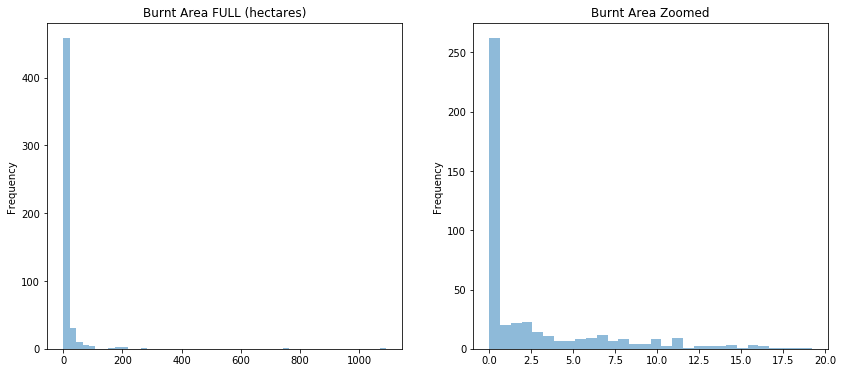

In [13]:
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(14,6))
df.area.plot.hist(ax = ax1, bins=50, alpha=0.5, title="Burnt Area FULL (hectares)");
df[df.area < 20].area.plot.hist(ax = ax2, bins=30, alpha=0.5, title="Burnt Area Zoomed");

### Correlation Analysis

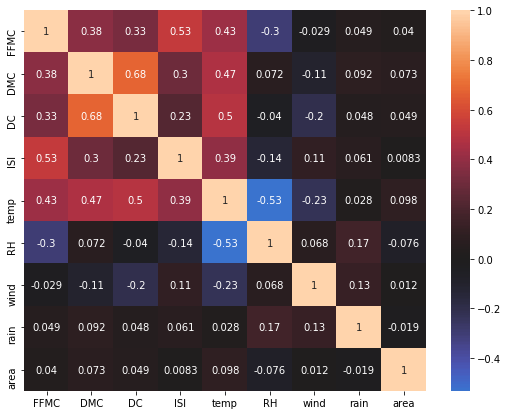

In [14]:
fig, ax = plt.subplots(figsize=(9,7))
sns.heatmap(df.corr(), annot=True, ax=ax, center=0);

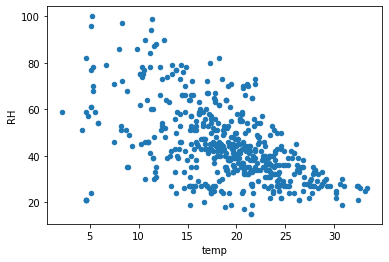

In [15]:
df.plot.scatter(x='temp', y='RH');

### Modelling

In [25]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
pd.options.display.float_format = "{:,.2f}".format

In [26]:
features = numerical_cols
X = df[features]
y = df.area
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=25)
print(X_train.shape, X_test.shape)
print(y_test.shape, y_test.shape)

(387, 9) (129, 9)
(129,) (129,)


In [31]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print(model.coef_)
y_pred[:10]

[ 1.24949301e-15 -5.13478149e-16 -1.68268177e-15 -1.67953759e-15
 -4.23814629e-16  1.42897846e-16  5.73346438e-16  1.16856623e-14
  1.00000000e+00]


array([ 7.02000000e+00,  1.01300000e+01,  5.18000000e+00,  3.77100000e+01,
       -5.88935570e-13, -3.32737776e-13,  4.42000000e+00,  3.75627040e-14,
       -3.02197611e-13,  2.64300000e+01])

In [28]:
pd.DataFrame({'Actuals': y_test, 'Predictions': y_pred})

,Actuals,Predictions
416,7.02,7.02
242,10.13,10.13
307,5.18,5.18
224,37.71,37.71
440,0.00,-0.00
...,...,...
97,0.00,0.00
356,1.26,1.26
73,0.00,-0.00
376,0.00,-0.00


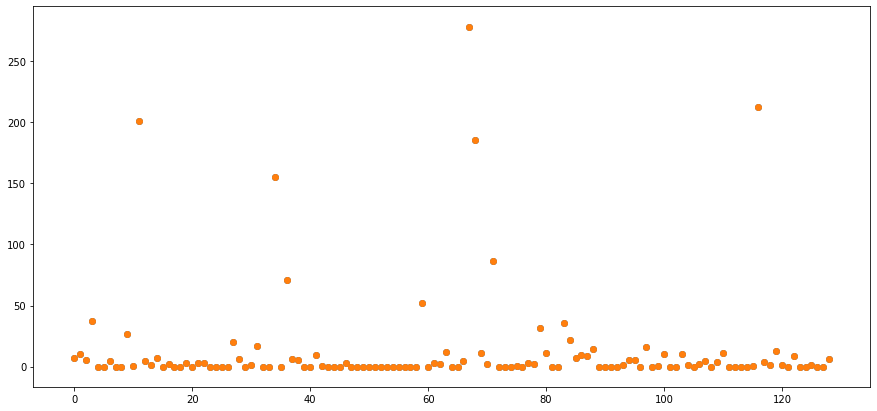

In [32]:
x_ticks = range(y_test.shape[0])
fig, ax = plt.subplots(figsize=(15,7))
ax.scatter(x_ticks, y_test, label='test');
ax.scatter(x_ticks, y_pred, label='preds')

In [33]:
print('Mean squared error: %.2f'
      % mean_squared_error(y_test, y_pred))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y_test, y_pred))

Mean squared error: 0.00
Coefficient of determination: 1.00
